In [1]:
import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt
from scipy import stats

## 영화 평점 데이터 생성

In [2]:
movierating = [[1,1,1,0,0],[3,3,3,0,0],[4,4,4,0,0],[5,5,5,0,0],[0,0,0,4,4],[0,0,0,5,5],[0,0,0,2,2]]

In [3]:
movierating

[[1, 1, 1, 0, 0],
 [3, 3, 3, 0, 0],
 [4, 4, 4, 0, 0],
 [5, 5, 5, 0, 0],
 [0, 0, 0, 4, 4],
 [0, 0, 0, 5, 5],
 [0, 0, 0, 2, 2]]

In [8]:
type(movierating)

list

## svd 생성

In [10]:
u, s, vh = np.linalg.svd(movierating, full_matrices=False)
assert np.allclose(movierating, np.dot(u, np.dot(np.diag(s), vh)))

### 사용자

In [11]:
u

array([[-0.14002801,  0.        ,  0.41748286, -0.56011203, -0.42008403],
       [-0.42008403,  0.        ,  0.15383647, -0.20639328,  0.84520504],
       [-0.56011203,  0.        ,  0.20511529,  0.72480896, -0.20639328],
       [-0.70014004,  0.        , -0.33989068, -0.3439888 , -0.2579916 ],
       [ 0.        , -0.59628479,  0.64444444,  0.        ,  0.        ],
       [ 0.        , -0.74535599, -0.44444444,  0.        ,  0.        ],
       [ 0.        , -0.2981424 , -0.17777778,  0.        ,  0.        ]])

### concept(대각행렬) 특이값 확인

In [12]:
s

array([ 12.36931688,   9.48683298,   0.        ,   0.        ,   0.        ])

### 영화

In [46]:
vh

array([[-0.57735027, -0.57735027, -0.57735027,  0.        ,  0.        ],
       [-0.        , -0.        , -0.        , -0.70710678, -0.70710678],
       [ 0.        ,  0.        ,  0.        , -0.70710678,  0.70710678],
       [ 0.        , -0.70710678,  0.70710678,  0.        ,  0.        ],
       [ 0.81649658, -0.40824829, -0.40824829,  0.        ,  0.        ]])

## 특이값 matrix로 확인

In [18]:
S = np.diag(s)
S

array([[ 12.36931688,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   9.48683298,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,   0.        ]])

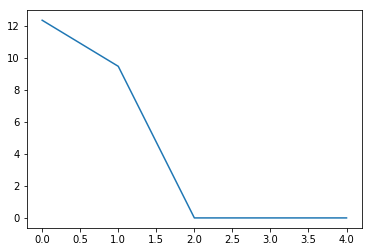

In [21]:
plt.plot(s)
plt.show()

특이값은 경험상 90%에 해당하는 에너지를 차지할 만큼 충분한 특이 값들을 보유하는 것이 좋은 방법입니다. 즉, 보유한 특이 값들의 제곱의 합이 모든 특이 값의 제곱의 합에 최소 90%가 되어야 합니다. 스텐포드 대학교의 추천 시스템 강의에서는 80%~90%의 에너지를 유지하라고 가이드 합니다.

아래 데이터 기준으로 2개의 특이값을 선택하면 된다.

In [29]:
s_svd = np.cumsum(s**2/sum(s**2))

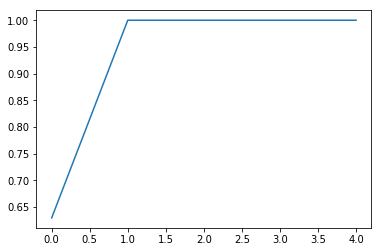

In [30]:
plt.plot(s_svd)
plt.show()

## 차원 축소값 만들기

In [35]:
U = u[0:8, 0:2]
U

array([[-0.14002801,  0.        ],
       [-0.42008403,  0.        ],
       [-0.56011203,  0.        ],
       [-0.70014004,  0.        ],
       [ 0.        , -0.59628479],
       [ 0.        , -0.74535599],
       [ 0.        , -0.2981424 ]])

In [37]:
S = np.diag(s[0:2])
S

array([[ 12.36931688,   0.        ],
       [  0.        ,   9.48683298]])

In [51]:
VH = vh[0:2,0:5]
VH

array([[-0.57735027, -0.57735027, -0.57735027,  0.        ,  0.        ],
       [-0.        , -0.        , -0.        , -0.70710678, -0.70710678]])

## 원래 평점데이터로 만들기

In [55]:
np.matmul(np.matmul(U,S),VH)

array([[ 1.,  1.,  1.,  0.,  0.],
       [ 3.,  3.,  3.,  0.,  0.],
       [ 4.,  4.,  4.,  0.,  0.],
       [ 5.,  5.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  4.],
       [ 0.,  0.,  0.,  5.,  5.],
       [ 0.,  0.,  0.,  2.,  2.]])

## 영화를 평가한 아이템간의 유사도 구하기

In [61]:
np.corrcoef(np.transpose(movierating))

array([[ 1.        ,  1.        ,  1.        , -0.74878347, -0.74878347],
       [ 1.        ,  1.        ,  1.        , -0.74878347, -0.74878347],
       [ 1.        ,  1.        ,  1.        , -0.74878347, -0.74878347],
       [-0.74878347, -0.74878347, -0.74878347,  1.        ,  1.        ],
       [-0.74878347, -0.74878347, -0.74878347,  1.        ,  1.        ]])

In [66]:
item = np.matmul(S,VH)
item

array([[-7.14142843, -7.14142843, -7.14142843,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -6.70820393, -6.70820393]])

In [69]:
np.corrcoef(np.transpose(item))

array([[ 1.,  1.,  1., -1., -1.],
       [ 1.,  1.,  1., -1., -1.],
       [ 1.,  1.,  1., -1., -1.],
       [-1., -1., -1.,  1.,  1.],
       [-1., -1., -1.,  1.,  1.]])

## 영화를 평가한 사용자간의 유사도 구하기

In [62]:
np.corrcoef(movierating)

array([[ 1.,  1.,  1.,  1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1.],
       [-1., -1., -1., -1.,  1.,  1.,  1.],
       [-1., -1., -1., -1.,  1.,  1.,  1.],
       [-1., -1., -1., -1.,  1.,  1.,  1.]])

In [63]:
user = np.matmul(U,S)
user

array([[-1.73205081,  0.        ],
       [-5.19615242,  0.        ],
       [-6.92820323,  0.        ],
       [-8.66025404,  0.        ],
       [ 0.        , -5.65685425],
       [ 0.        , -7.07106781],
       [ 0.        , -2.82842712]])

In [64]:
np.corrcoef(user)

array([[ 1.,  1.,  1.,  1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1.],
       [-1., -1., -1., -1.,  1.,  1.,  1.],
       [-1., -1., -1., -1.,  1.,  1.,  1.],
       [-1., -1., -1., -1.,  1.,  1.,  1.]])

## 번외

In [14]:
new_movierating = np.dot(u,np.dot(np.diag(s),vh))
print(new_movierating)

[[ 1.  1.  1.  0.  0.]
 [ 3.  3.  3.  0.  0.]
 [ 4.  4.  4.  0.  0.]
 [ 5.  5.  5.  0.  0.]
 [ 0.  0.  0.  4.  4.]
 [ 0.  0.  0.  5.  5.]
 [ 0.  0.  0.  2.  2.]]


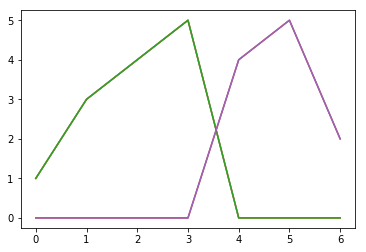

In [16]:
plt.plot(new_movierating)
plt.show()